## Analyzing Tabular Omics Data using Pandas DataFrames



## Working With A Feature Table of Microbial Counts


In this jupyter notebook we will do some basic graphing of a feature table of microbes by samples. We'll work with tabular data representing one of the microbiome change scenarios from the previous section. 

Here is the scenario in cartoon form:
<img src="./resources/Scenario_1_specific_pathogen_w_table-01.png" width="400"  description="A cartoon of multicolored microbes in 6 healthy people or 6 people with a disease. The picture shows 12 boxes (one per person). In each box there are multiple microbes of different types. A table below will list the counts of microbes in each sample if you cannot view them here."> 



#### Checking that the raw data is present

As a first step let's check that we have 'scenario1_otus.txt' in our current working directory. The listdir function in the builtin os module returns a list of all contents of a specified directory on your computer.

It can be useful to run it prior to trying to open files if you need to remember filenames. In this case, the raw data we want to open is stored in the resources folder within the folder for this chapter. Let's import the listdir function and quickly check that our data is there...

In [101]:
from os import listdir
print("Directory contents:",listdir("./resources/"))

Directory contents: ['.DS_Store', 'evenness.png', 'paleobiodb_dinosauria_occurences.csv', 'richness.png', 'richness_vs_eveness.png', 'scenario1_otus_pandas.txt', 'Scenario_1_specific_pathogen_no_table-01.png', 'Scenario_1_specific_pathogen_table_only.png', 'Scenario_1_specific_pathogen_w_table-01.png', 'Scenario_2_community_shift.ai', 'Scenario_2_community_shift_no_table-01.png', 'Scenario_3_microbial_overgrowth_no_table-01.png', 'Scenario_4_alpha_diversity_with_table_r2-01.png', 'Scenario_5_beta_diversity_no_table-01.png']


Great. Now that we've seen that the data is available, let's load it into python using [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)!

In [102]:
from pandas import read_csv

#Load the text version of the table (a csv file) into python using pandas
feature_table = read_csv("./resources/scenario1_otus_pandas.txt",sep="\t")

Once we've seen that the table loaded, let's work on figuring out how pandas is representing it inside python. We'll use the type() function to work out what type of object our feature table is:

In [103]:
type(feature_table)

pandas.core.frame.DataFrame

It looks like our table of data has been loaded as a pandas DataFrame. DataFrame objects serve as a convenient and very powerful way to represent tabular data. They represent those data as a table with row and column labels. Subsets of the data along a row or column can be pulled out as pandas Series objects.

To examine the feature table in a Jupyter notebook, we can simply type the name of the variable that holds it on it's own line:


In [104]:
feature_table

,OTU_ID,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
0,OTU1,3,4,2,2,0,4,4,4,0,3,2,2
1,OTU2,4,1,3,4,1,3,3,3,4,1,1,4
2,OTU3,1,4,2,1,4,2,2,2,1,4,4,1
3,OTU4,2,3,0,1,2,0,1,2,3,0,2,1
4,OTU5,0,0,0,0,0,0,1,4,2,2,3,4


#### Setting the row labels

An important feature of pandas DataFrames is their index column. This serves as a set of unique row labels for each row in your data. Because we didn't specify an index column when we loaded our data we have to set it manually. We can do so with the dataframe's set_index method.

In [105]:
#Use OTU ID column to label each row
feature_table = feature_table.set_index('OTU_ID')

If we view the dataframe again, we should notice that the left hand column of numbers has dissapeared, and our rows are now correctly labelled by microbe

#### Accessing column data

We might want to access the rows or columns of our pandas data directly so that we can do calculations. A nice tutorial on this can be found here: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/.

In brief, we can select a column by indexing into the pandas DataFrame object using a column name. I currently have the OTUs as columns, so we could access them with feature_table["OTU1"]

In [106]:
#Access a column 
print(feature_table["patient1"])

OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


However, this way of selecting columns in pandas is a bit special-purpose - it doesn't always extend in the simplest way to rows for example.

#### A consistent way to access row or column data in pandas

An alternative way to index into a pandas DataFrame is by using the .loc indexer (accessed by the name of your dataframe and then .loc)

Note that this is not called like a function (so not 'df.loc('whatever')'), but more a way of indexing (closer to how you would call it if loc were a dict that was a property of the dataframe).

When using .loc, we specify what rows we want, then what columns we want. We can use the colon character to indicate 'all'. In this way we can do row and column selection using exactly the same syntax, which is nice for those of us who don't like to remember too many things.

(More info on this here: https://brohrer.github.io/dataframe_indexing.html)

#### Select a column using .loc

Here's how we can use the DataFrame loc property to select a column by name:

In [107]:
#Recall that : means all, and we specify rows,columns when using .loc
print("Select all of the OTU1 column:")
selected_column = feature_table_transposed.loc[:,'OTU1']
print(selected_column)

Select all of the OTU1 column:
patient1     1
patient2     1
patient3     1
patient4     1
patient5     0
patient6     1
patient7     1
patient8     1
patient9     0
patient10    1
patient11    1
patient12    1
Name: OTU1, dtype: int64


Cool! So we see that we now get the count of microbe 1 ('OTU1') in each patient's sample. However, this data type looks kinda funky. That's because it is a pandas Series object. It therefore doesn't print in the same way as either a pandas DataFrame or a python list. We'll talk more about that in a minute. For now, let's continue to explore how to select data using .loc.

#### Select a row from a pandas DataFrame with .loc


In [108]:
print("\nSelect the patient1 row:")
selected_row = feature_table_transposed.loc['patient1',:]
print(selected_row)




Select the patient1 row:
OTU_ID
OTU1    1
OTU2    1
OTU3    1
OTU4    1
OTU5    0
Name: patient1, dtype: int64


#### Select a single entry in our table using .loc by specifying the row and column names

We can combine these types of indices to access the value of a single cell

In [109]:
print("\nSelect one cell by specifying row and column:")
selected_row_and_column = feature_table_transposed.loc['patient1','OTU1']
print(selected_row_and_column)


Select one cell by specifying row and column:
1


#### Testing what we get back when we select a pandas column or row.

We said up above that these pandas Series objects we got back from selecting row or columns of a dataframe don't look quite like either lists or DataFrames. In this case we know the result is a Series, but in cases like this where we don't already know the type of an object we can use the builtin type() function to check the type of any object in python. 

In [110]:
selected_column = feature_table_transposed.loc[:,'OTU1']
selected_column_type = type(selected_column)

#WHAT IS THIS? Print the answer to screen
print("\nfeature_table['OTU1'] is an object of type:", selected_column_type)


feature_table['OTU1'] is an object of type: <class 'pandas.core.series.Series'>


Great, so we've now proven to ourselves that this is a pandas Series object. We can now do some Googling to find out more about this data type. One great resource is from the Beyond Data Science blog: https://towardsdatascience.com/pandas-series-a-lightweight-intro-b7963a0d62a2. 

One of the first tasks we might have is to convert this Series back into a basic python type like a list. 

#### Getting a list out of a pandas Series object

Let's say we don't want to work with the data as a series, but instead to convert it to a list. We can do that using the builtin list() function.
        

In [111]:
OTU1_data = list(feature_table_transposed.loc[:,"OTU1"])
print(OTU1_data)

[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]


#### Getting a numpy array object out of a pandas Series object

an alternative way of getting numeric data out of a pandas Series object is by calling its .values property, which returns a numpy array of the data.

NOTE: values is a *property* (data stored in the object) not a *method* (function associated with the object. The main reason this matters is because if you call .values() with parentheses by accident, you will get an error

In [112]:
OTU1_data_as_array = feature_table_transposed.loc[:,"OTU1"].values
print("Data as a numpy array:",OTU1_data_as_array)

Data as a numpy array: [1 1 1 1 0 1 1 1 0 1 1 1]


#### Filter rows of a pandas dataframe by column values

Let's say we want just the patients *without* OTU5 or *without* OTU4. In that case we can use a condition within our .loc selection. A vertical bar | should be read as 'or'. 

In [113]:
columns_to_grab = (feature_table.loc['OTU5',:] == 0) | (feature_table.loc['OTU4',:] == 0)

feature_table.loc[:,columns_to_grab]

,patient1,patient2,patient3,patient4,patient5,patient6,patient10
OTU_ID,,,,,,,
OTU1,3,4,2,2,0,4,3
OTU2,4,1,3,4,1,3,1
OTU3,1,4,2,1,4,2,4
OTU4,2,3,0,1,2,0,0
OTU5,0,0,0,0,0,0,2


#### Rendering DataFrames as HTML

In a Jupyter Notebook, DataFrames can be rendered simpy by typing the variable name holding them on it's own line. However, if working outside of Jupyter notebooks it can be useful to know how to generate HTML versions of these tables where needed. This is shown below:

In [114]:
#Converting it to HTML to show it
feature_table_to_show = feature_table.to_html()

#Show the HTML
from IPython.display import HTML
feature_table_as_html = HTML(feature_table_to_show)
feature_table_as_html

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


## Styling Pandas dataframes 

Pandas dataframes can be [styled](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) in several ways to highlight values of interest. We can use this styling to provide a quick heatmap-like coloring to a pandas table:

In [115]:
#Set the feature table display style
#to use a background gradient based on values.
feature_table_visualization = feature_table.style.background_gradient(cmap='Blues')
feature_table_visualization

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


### Graphing pandas DataFrames using heatmaps

One of the advantages of pandas DataFrames is that they integrate well with many other commonly used visualization and statistics packages in python. If we want a true heatmap that, for example, clusters rows and columns by similarity we will need to step outside of the pandas module alone and combine it with the [Seaborn](https://seaborn.pydata.org/) graphing package. 

[Seaborn](https://seaborn.pydata.org/) is a graphing package built on top of [matplotlib](https://matplotlib.org/1.3.1/index.html). It integrates smoothly with pandas, and the two are commonly used together. 

The clustermap function in seaborn is a convenient way to make a heatmap of our data, clustered according to the similarity of rows and columns. In this chart the rows will be the different microbes, the columns will be the patients, and the color of each cell will represent the count of microbes in each patient. The order of the  rows and columns will reflect the similarity of their counts.

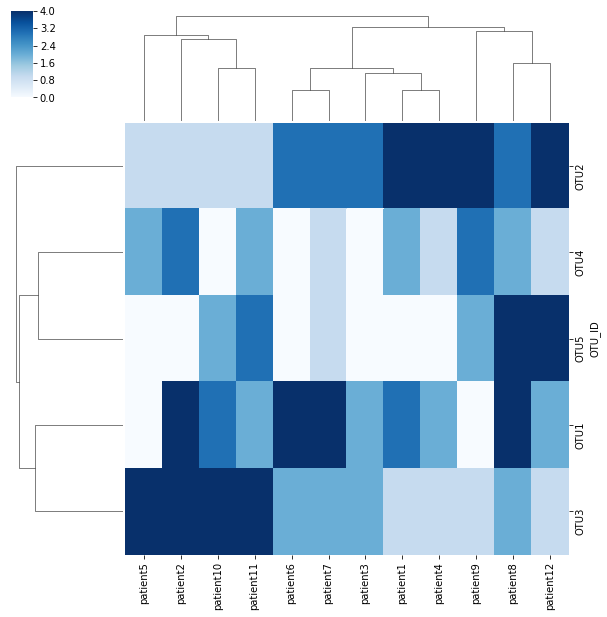

In [116]:
%matplotlib inline
from seaborn import clustermap
clustermap(feature_table,cmap="Blues")

If we don't want to cluster the data, and just want a basic heatmap, we can set the row_cluster and col_cluster parameters to False.

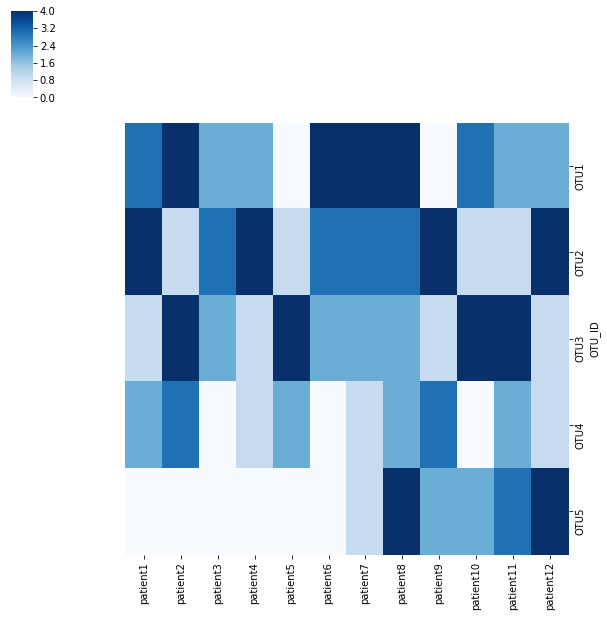

In [117]:
clustermap(feature_table,row_cluster=False,col_cluster=False,cmap="Blues")

If we wanted to swap the rows and columns, we could use the pandas DataFrame method .transpose() to swap the rows and columns of the DataFrame, and then rerun the clustermap on the transposed data. We can also separately control clustering of rows and columns with the row_cluster and col_cluster parameters. Finally, we can change the color mapping or 'cmap' using the cmap paramter. 

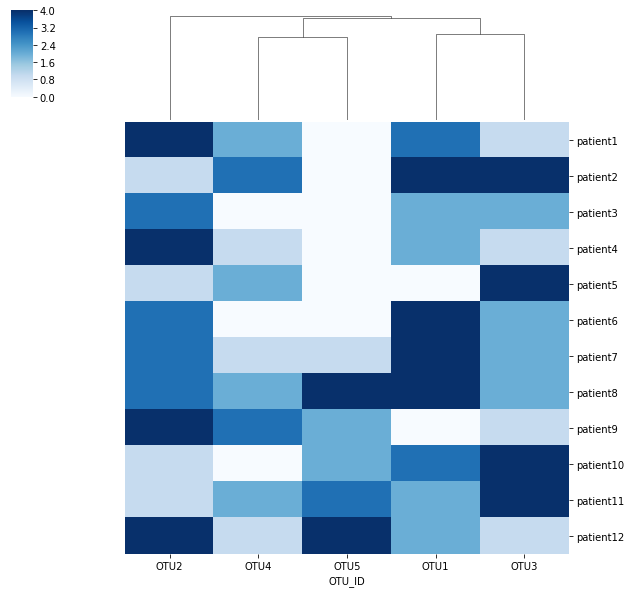

In [118]:
feature_table_transposed = feature_table.transpose()
clustermap(feature_table_transposed, row_cluster=False,col_cluster=True,cmap='Blues')

## Calculating Microbiome Richness using Pandas DataFrames  

Next we will calculate the alpha diversity in this dataset. This is equivalent to calculating how many species are represented in each with counts > 0. (We'll leave aside for the moment important concerns about normalization)

In [122]:
#First look up the names of all the samples (so all the column names)
print(feature_table.columns.values)

['patient1' 'patient2' 'patient3' 'patient4' 'patient5' 'patient6'
 'patient7' 'patient8' 'patient9' 'patient10' 'patient11' 'patient12']


#### A solution for calculating alpha diversity using for loops

One way we might calculate alpha diversity is using for loops. The approach is:

- grab each column 
- iterate over the rows
- if a row is non-zero add 1 to the alpha diversity of that column
- print (or yield) the alpha diversity for the current column before moving on to the next one.

You can think of this as a'traditional' approach that doesn't rely on much of pandas special functionality other than a single step where we grab our column of interest.

In [123]:
adiv_by_patient = {}
for patient in feature_table.columns.values:
    adiv = 0   
    patient_otus = feature_table.loc[:,patient]
    for otu_count in patient_otus :
        if otu_count > 0:
            adiv += 1            
    print(f"{patient}: {adiv}")
    adiv_by_patient[patient] = adiv
    


patient1: 4
patient2: 4
patient3: 3
patient4: 4
patient5: 3
patient6: 3
patient7: 5
patient8: 5
patient9: 4
patient10: 4
patient11: 5
patient12: 5


A related solution uses conditional indexing to find all cells that have a value above 0 and set it to 1. This effectively converts the table to a presence/absence table. One can then use the built in sum function to add up the columns:

In [124]:
#Convert all values above 0 to 1
feature_table[feature_table >0] = 1
#Sum along the columns
feature_table.sum()

patient1     4
patient2     4
patient3     3
patient4     4
patient5     3
patient6     3
patient7     5
patient8     5
patient9     4
patient10    4
patient11    5
patient12    5
dtype: int64

Note that this is not at all the only way to calculate this quantity. For example, if you are familiar with the numpy python library, a similar effect can be achiveved by extracting a numpy array from the feature table, using the numpy where function to set all non-zero cells to 1 and then using the numpy sum function to sum down the colums.

## Conclusion

Although tabular data can have many origins, the steps for analyzing it are often similar. Pandas DataFrames present a powerful and very widely used tool for analyzing tabular data in python.

## Exercises

1. **Normalizing a table**. Write a function that *normalizes* a table of species counts expressed as a pandas DataFrame. To normalize the table, calculate the sum of each column (assuming the columns are the samples), and divide each entry by its column sum. For example, patient6 has values 4,3, and 2 for a total of 9 counts. Expressed as proportions these would be 4/9, 3/9, and 2/9 or ~0.444, ~0.333, and ~0.222.

2. **Calculating Shannon's Diversity Index**. Shannon's Diversity Index (H) is a measure of alpha diversity in ecological communities that incorporates elements of both richness and evenness (see e.g. this [post](http://www.tiem.utk.edu/~gross/bioed/bealsmodules/shannonDI.html)). Mathematically it is straightforward to calculate: iterate over all the species in a community. One by one, multiply each species' proportion in the community by the natural log of that proportion (p * ln(p)). Sum up the result and multiply it by -1. Or if you prefer here is the same statement put into mathematical notation: \begin{equation*}H = -\sum_{i=1}^n p_i*ln(p_i)  \end{equation*} Write a function that calculates Shannon's Diversity Index on microbial community data expressed as a table. Check that your calculation is working correctly by comparing against a hand-calculated result. For example, patient6 has values 4,3, and 2 for a total of 9 counts. Expressed as proportions these would be 4/9, 3/9, and 2/9. So the Shannon diversity would be -1 * ((4/9)*ln(4/9) + (3/9)*ln(3/9) + (2/9)*ln(2/9)) or  ~1.06.

3. **Short answer:** Do you think incorporating elements of both richness and evenness in a single measure is an advantage, or would you prefer this information in separate measures? What might be a situation where one approach is preferred over the other?

 

## Project Ideas

**Study the alpha diversity of a group over time using fossil data and pandas**. The Paleobiology Database ([paleobiodb.org](https://paleobiodb.org/#/)) let's you visualize and filter fossil data for different groups of animals over time. Filtering and then using the chart icon on the left let's you visualize alpha diversity over time for a given group. Download the raw data for your taxon of interest as a .csv file. Opening it in Excel you will notice the first ~15 rows have header info that needs to be trimmed off for pandas to read the file. After that there are many columns of data describing each fossil. Pay particular attention to the max_ma and min_ma columns: these represent the maximum and minimum number of millions of years ago that each fossil was found. Use table filtering to gather data according to some category of interest: the different groups within your taxon, fossils found on different continents, etc, and compare alpha diversity between them. Extend your method to use rarefaction (random subsampling) to normalize the number of counts between categories so that your total is not artifactually influenced by sampling depth. You can also try plotting the diversity of your different categories over time to try to understand major events (migration, meteor impacts, etc) that might have caused extinctions within your group. 

## Further Reading

[1] DataQuest intro to Pandas for Data Analysis using IGN video game reviews [link](https://www.dataquest.io/blog/pandas-python-tutorial/)

[2] The Pandas API reference for DataFrames and Data Series [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html). This contains lists of useful methods and their documentation.



